# Addition

In this model, you will see a transformation which is the basic property of single
neurons (i.e., addition). Addition transforms two inputs into a single output which is
their sum. You will construct a network that adds two inputs. The network utilizes two
communication channels going into the same neural population. Addition is somewhat
‘free’, since the incoming currents from different synaptic connections interact
linearly.

In [1]:
# Setup the environment
import nengo
from nengo.dists import Uniform
from nengo.processes import Piecewise

## Create the Model

This model has ensembles "A" and "B" which represent the two inputs to be added. The
"Sum"
ensemble represents the added value. All the parameters used in the model are as
described in the book, with the "Sum" ensemble having a radius of 2 to account for the
maximum range of summing the input values.

While connecting the inputs to the ensembles "A" and "B", the transform is set to 1
(which
is the default value) since this should be a communication channel. However as described
in the book, you can scale a represented variable by a constant value by changing the
transform. Example: if you set the transform of ensemble "B" to 0 and ensemble "A" to 2
(i.e., `nengo.Connection(stim_A, ens_A, transform=[2])`), the sum will be twice of the
`stim_A`. You will also need to set an appropriate radius for the "Sum" ensemble to
avoid
saturation when you change the transform values.

In [2]:
# Create the network object to which we can add ensembles, connections, etc.
model = nengo.Network(label="Scalar Addition")

with model:
    # Inputs to drive the activity in ensembles A and B
    stim_A = nengo.Node(
        Piecewise({0: -0.75, 1.25: 0.5, 2.5: 0.70, 3.75: 0}), label="Input A"
    )
    stim_B = nengo.Node(
        Piecewise({0: 0.25, 1.25: -0.5, 2.5: 0.85, 3.75: 0}), label="Input B"
    )

    # Ensembles with 100 LIF neurons each
    # Represents the first input (A)
    ens_A = nengo.Ensemble(100, dimensions=1, max_rates=Uniform(100, 200), label="A")
    # Represents the second input (B)
    ens_B = nengo.Ensemble(100, dimensions=1, max_rates=Uniform(100, 200), label="B")
    # Represents the sum of two inputs
    ens_sum = nengo.Ensemble(
        100, dimensions=1, max_rates=Uniform(100, 200), radius=2, label="Sum"
    )

    # Connecting the input nodes to ensembles
    nengo.Connection(stim_A, ens_A)
    nengo.Connection(stim_B, ens_B)

    # Connecting ensembles A and B to the Sum ensemble
    nengo.Connection(ens_A, ens_sum)
    nengo.Connection(ens_B, ens_sum)

## Add Probes to Collect Data

In [3]:
with model:
    input_A_probe = nengo.Probe(stim_A)  # Input to ensemble A
    input_B_probe = nengo.Probe(stim_B)  # Input to ensemble B
    A_probe = nengo.Probe(ens_A, synapse=0.01)  # Decoded output of ensemble A
    B_probe = nengo.Probe(ens_B, synapse=0.01)  # Decoded output of ensemble B
    sum_probe = nengo.Probe(ens_sum, synapse=0.01)  # Decoded output of Sum ensemble

## Run the Model

Import the `nengo_gui` visualizer to run and visualize the model.

In [ ]:
from nengo_gui.ipython import IPythonViz

IPythonViz(model, "ch3-addition.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs
as shown in the figure below.

The "Input A" and "Input B" graphs show the inputs to ensembles `ens_A` and `ens_B`
respectively. The
graphs "A" and "B" show the decoded value of the activity of ensembles `ens_A` and
`ens_B` respectively.
The "Sum" graph shows that the decoded value of the activity in the `ens_sum` ensemble
provides
a good estimate of the sum of inputs `ens_A` and `ens_B`.

You can use the sliders to change the input values provided by the "Input A" and "Input
B"
nodes.

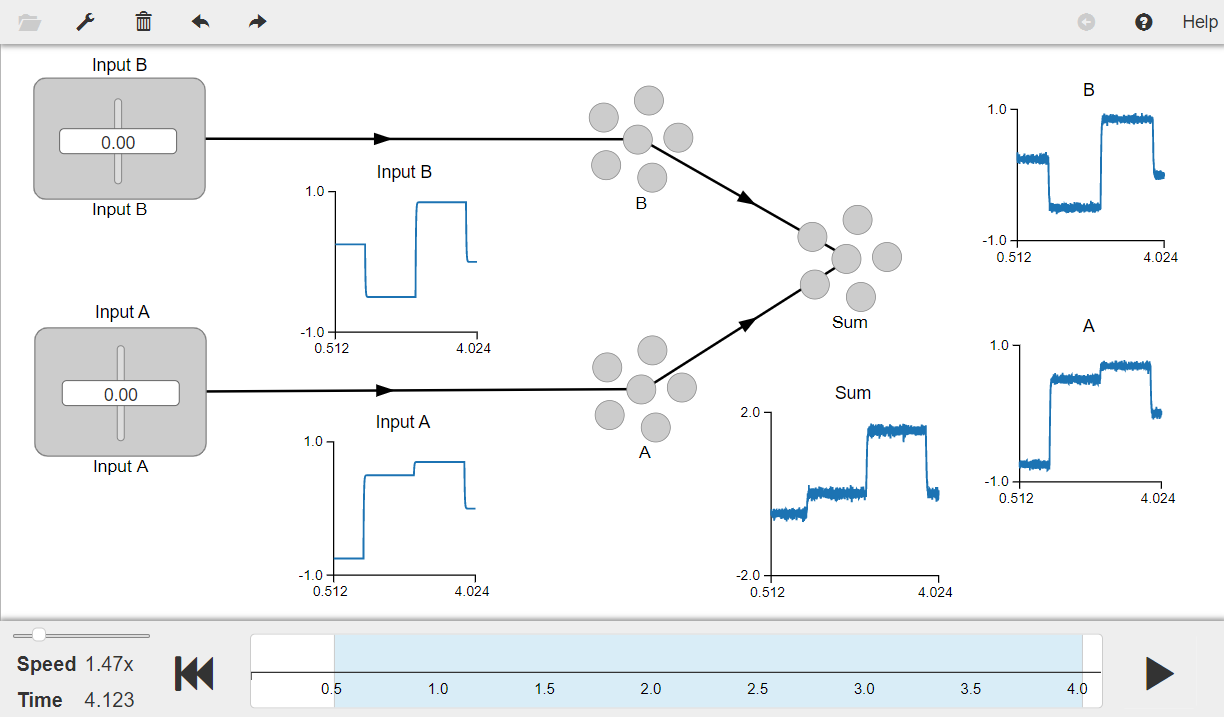

In [4]:
from IPython.display import Image

Image(filename="ch3-addition.png")